## Importing the libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from collections import Counter 
from wordcloud import WordCloud, STOPWORDS
import re
stopwords = set(STOPWORDS)

## Importing the Datasets

In [2]:
training_data = pd.read_excel('hello/Constraint_Train.xlsx')
testing_data = pd.read_csv('hello/english_test_with_labels.csv')
validation_data = pd.read_csv('hello/Constraint_Val.csv')

In [3]:
whole_data = pd.concat([training_data, testing_data, validation_data])
print("Number of data points: ", len(whole_data['id']))

Number of data points:  10700


In [6]:
whole_data.sample(5)

,id,tweet,label
1609,1610,"""Sinn Féin Have Coronavirus, Pass It On"" Varad...",fake
2471,2472,"Underrated supplement: Acetylcysteine, NAC, AC...",fake
2365,2366,#COVID19 vaccine: @ArthurCaplan asks if our pr...,real
1677,1678,📢#CoronaVirusUpdates: ✅India's #COVID19 recove...,real
2044,2045,“I’ve Received Death Threats” We Speak With Th...,fake


In [269]:
whole_data.shape

(10700, 3)

## EDA

In [270]:
whole_data.isnull().sum()

id       0
tweet    0
label    0
dtype: int64

In [271]:
real_tweets = whole_data[whole_data['label']=='real']['tweet']
fake_tweets = whole_data[whole_data['label']=='fake']['tweet']
all_tweets = whole_data['tweet']
all_tweets.head(8)

0    The CDC currently reports 99031 deaths. In gen...
1    States reported 1121 deaths a small rise from ...
2    Politically Correct Woman (Almost) Uses Pandem...
3    #IndiaFightsCorona: We have 1524 #COVID testin...
4    Populous states can generate large case counts...
5    Covid Act Now found "on average each person in...
6    If you tested positive for #COVID19 and have n...
7    Obama Calls Trump’s Coronavirus Response A Cha...
Name: tweet, dtype: object

In [272]:
print("No of real news:",len(real_tweets))
print("No of fake news:",len(fake_tweets))

No of real news: 5600
No of fake news: 5100


Text(0.5, 1.0, 'Class Distribution')

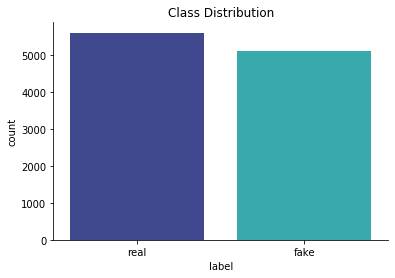

In [273]:
sns.countplot(x='label', data = whole_data, palette = 'mako',
              saturation = 1)
sns.despine()
plt.title('Class Distribution')

In [274]:
print(sum(len(x) for x in all_tweets) / len(all_tweets))
print(sum(len(x) for x in real_tweets) / len(real_tweets))
print(sum(len(x) for x in fake_tweets) / len(fake_tweets))

181.89429906542057
217.12410714285716
143.21058823529413


## Text Preprocessing

In [275]:
# for https://..............
w=[]
for i in range(700):
    u=re.findall(r"http\S+",all_tweets.iloc[i])
    if(len(u)!=0):
        w.append(u)
        
w

[['https://t.co/YASGRTT4ux'],
 ['https://t.co/thF8GuNFPe'],
 ['https://t.co/Yh3ZxknnhZ'],
 ['https://t.co/1pYW6cWRaS'],
 ['https://t.co/hhigDd24fE'],
 ['https://t.co/z5kkXpqkYb.', 'https://t.co/9PaMy0Rxaf'],
 ['https://t.co/DeDqZEhAsB'],
 ['https://t.co/L5V2x6G9or'],
 ['https://t.co/uArGZTrH5L.', 'https://t.co/biZTxtUKyK'],
 ['https://t.co/I8YjjrNoTh', 'https://t.co/o0Nk6gpyos'],
 ['https://t.co/woPlKz1bZC', 'https://t.co/9VGUoJu5cS'],
 ['https://t.co/0vhHD4uFv9.', 'https://t.co/D8YSeE3vXv'],
 ['https://t.co/au9kzAchGh'],
 ['https://t.co/jNarQEkGhr', 'https://t.co/o7EoaYeQH1'],
 ['https://t.co/rLcTuIcIHO', 'https://t.co/WdoocCiXFu'],
 ['https://t.co/q5kwqJmFRt'],
 ['https://t.co/bc8Re0Ai3Y'],
 ['https://t.co/2RgFWeSLrv', 'https://t.co/Lz1IaMdPZg'],
 ['https://t.co/pgXjssaRCB', 'https://t.co/g4WYcppDSO'],
 ['https://t.co/c4F0aouMLd.', 'https://t.co/u5tTl3m572'],
 ['https://t.co/ANHxHm1DPK'],
 ['https://t.co/c6yPex9khE'],
 ['https://t.co/fGCEGi3o7V'],
 ['https://t.co/xgPkPdvn0r'],
 ['htt

In [276]:
# replace decontracted words
t=[]
def decontracted(phrase):
    u=re.findall(r"won't", phrase)
    v= re.findall(r"can\'t", phrase)
    w=re.findall(r"n\'t", phrase)
    z= re.findall(r"\'re", phrase)
    if(u!=[]):
        t.append(u)
    if(v!=[]):
        t.append(v)
    if(w!=[]):
        t.append(w)
    if(z!=[]):
        t.append(z)       
for i in range(300):
    decontracted(all_tweets.iloc[i])
print(t)

[["n't"], ["n't", "n't"], ["'re"], ["'re"], ["'re"], ["'re"], ["'re"], ["'re"], ["can't", "can't"], ["n't", "n't"], ["'re"], ["can't"], ["n't"]]


## Importing necessary Text preprocessing Libraries

In [277]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer

In [278]:
def decontracted(phrase):
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [279]:
stops = set(stopwords.words("english"))
def cleantext(string):
    text = string.lower().split()
    text = " ".join(text)
    text = re.sub(r"http(\S)+",' ',text)    
    text = re.sub(r"www(\S)+",' ',text)
    text= decontracted(text)
    text = re.sub(r"&",' and ',text)  
    text = re.sub(r"@",' and ',text)  
    tx = text.replace('&amp',' ')
    text = re.sub(r"[^0-9a-zA-Z]+",' ',text)
    text = text.split()
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

In [280]:
training_data['tweet'] = training_data['tweet'].map(lambda x: cleantext(x))
validation_data['tweet'] = validation_data['tweet'].map(lambda x: cleantext(x))

In [281]:
training_data['tweet'][2]

'politically correct woman almost uses pandemic excuse reuse plastic bag coronavirus nashville'

### Extracting Tokens

In [282]:
def extract_tokens(tweets):
        tokens = ''
        for tweet in tweets:
                temp = str(tweet).lower().strip()
                temp = temp.replace('\n', ' ')
                temp = temp.replace('&amp', ' ')
                temp = temp.replace('#', ' ')
                temp = temp.replace('-', ' ')
                temp = temp.replace(';', ' ')
                temp = ' '.join(temp.split())
                tokens += temp + ' '
        return tokens

In [283]:
all_tokens = extract_tokens(all_tweets)
real_tokens = extract_tokens(real_tweets)
fake_tokens = extract_tokens(fake_tweets)

In [284]:
all_tokens

'the cdc currently reports 99031 deaths. in general the discrepancies in death counts between different sources are small and explicable. the death toll stands at roughly 100000 people today. states reported 1121 deaths a small rise from last tuesday. southern states reported 640 of those deaths. https://t.co/yasgrtt4ux politically correct woman (almost) uses pandemic as excuse not to reuse plastic bag https://t.co/thf8gunfpe coronavirus nashville indiafightscorona: we have 1524 covid testing laboratories in india and as on 25th august 2020 36827520 tests have been done : @profbhargava dg @icmrdelhi staysafe indiawillwin https://t.co/yh3zxknnhz populous states can generate large case counts but if you look at the new cases per million today 9 smaller states are showing more cases per million than california or texas: al ar id ks ky la ms nv and sc. https://t.co/1pyw6cwras covid act now found "on average each person in illinois with covid 19 is infecting 1.11 other people. data shows th

In [285]:
img_count = 0
stopwords = set(stopwords.words("english"))
def get_wordcloud(token_set):
    global img_count
    ### we extended the stopword set to avoid plotting 'https' and 'co' as they 
    ###occur frequently in the links
    wordcloud = WordCloud(width = 1200, height = 600, 
              background_color ='white', 
              stopwords = stopwords.union({'https','co'}), 
              min_font_size = 10).generate(token_set) 

  # plot the WordCloud image                        
    plt.figure(figsize = (12, 6), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0)
    figname = 'wordcloud'+ str(img_count)
    plt.savefig(figname) 
    img_count+=1

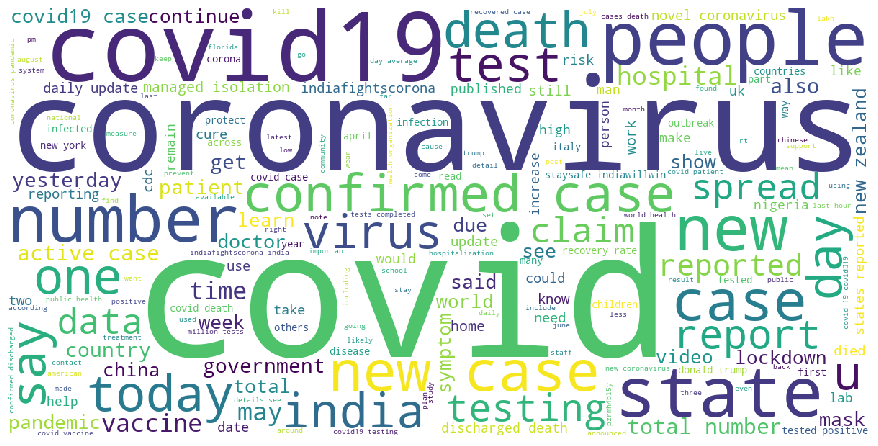

In [286]:
get_wordcloud(all_tokens)

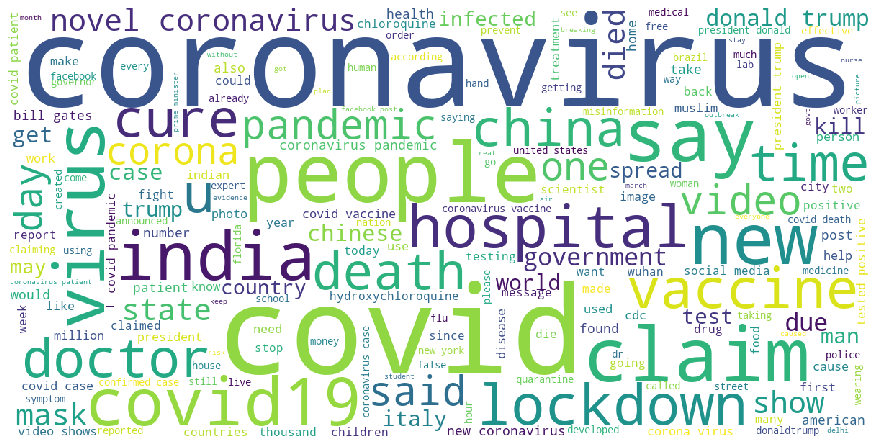

In [287]:
get_wordcloud(fake_tokens)

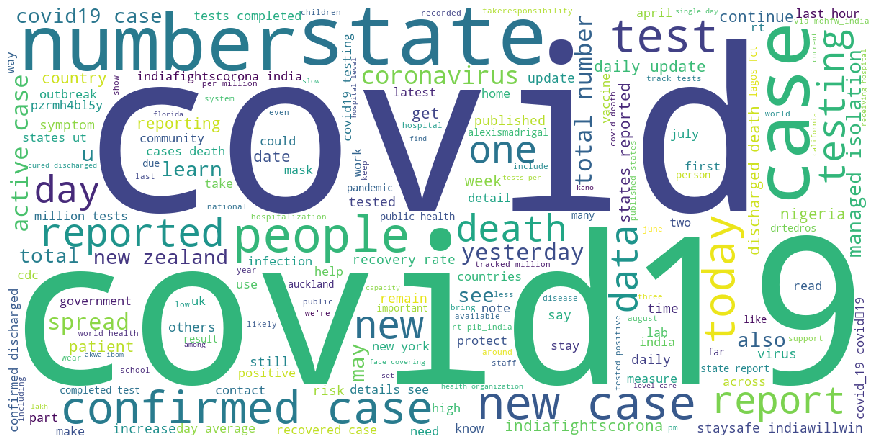

In [288]:
get_wordcloud(real_tokens)

In [289]:
lemmatizer = WordNetLemmatizer()
def Lemmatizer (preprocessed):
    preprocessed1=""
    words = nltk.word_tokenize(preprocessed)
    words = [lemmatizer.lemmatize(word) for word in words if word not in set(stopwords)]  
    preprocessed1=(' '.join(words))
    return preprocessed1

In [290]:
training_data1 = training_data['tweet'].map(lambda x: Lemmatizer(x))
validation_data1= validation_data['tweet'].map(lambda x: Lemmatizer(x))

In [291]:
training_data1.shape

(6420,)

In [292]:
stemmer = SnowballStemmer("english")
def Stemmer(preprocessed):
    preprocessed1=""
    words = nltk.word_tokenize(preprocessed)
    words = [stemmer.stem(word) for word in words if word not in set(stopwords)]  
    preprocessed1=(' '.join(words))
    return preprocessed1

In [293]:
training_data2 = training_data['tweet'].map(lambda x: Stemmer(x))
validation_data2= validation_data['tweet'].map(lambda x: Stemmer(x))

## Feature Extraction

### TF-IDF

In [294]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2), min_df=10)
tf_idf_vect.fit(training_data1)
print("some sample features(unique words in the corpus)",tf_idf_vect.get_feature_names()[0:10])
final_tf_idf = tf_idf_vect.transform(training_data1)
print("the type of count vectorizer ",type(final_tf_idf))
print("the shape of out text TFIDF vectorizer ",final_tf_idf.get_shape())

some sample features(unique words in the corpus) ['00', '00 confirmed', '00 pm', '000', '04', '08', '08 00', '09', '10', '10 day']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (6420, 2298)


## Models

## 1. Logistic Regression

In [295]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
import json

In [296]:
training_y=training_data['label'].values
validation_y=validation_data['label'].values

In [297]:
#lemmetiser,bow
pipeline1 = Pipeline([
        ('count_vectorizer', CountVectorizer()),  
        ('classifier', LogisticRegression())
    ])
pipeline1.fit(training_data1 , training_y)

Pipeline(memory=None,
         steps=[('count_vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
       

### Predictions

In [298]:
predictions = pipeline1.predict(validation_data1)
predictions

array(['fake', 'real', 'fake', ..., 'fake', 'fake', 'real'], dtype=object)

In [299]:
print(classification_report(predictions,validation_y))

              precision    recall  f1-score   support

        fake       0.95      0.91      0.93      1063
        real       0.92      0.95      0.93      1077

    accuracy                           0.93      2140
   macro avg       0.93      0.93      0.93      2140
weighted avg       0.93      0.93      0.93      2140



In [300]:
def get_metrics(predicted,true):
    metrics = dict()
    metrics['accuracy'] = round(accuracy_score(predicted, true), 5)
    metrics['precision'] = round(precision_score(predicted, true, average = 'weighted'), 5)
    metrics['recall'] = round(recall_score(predicted, true, average = 'weighted'), 5)
    metrics['f1'] = round(f1_score(predicted, true, average = 'weighted'), 5)
    
    return metrics

In [301]:
metrics = get_metrics(predictions, validation_y)
print(metrics)

{'accuracy': 0.93131, 'precision': 0.93199, 'recall': 0.93131, 'f1': 0.93127}


<hr style="border:1px solid gray"> </hr>

In [302]:
#stemmer,bow
pipeline2 = Pipeline([
        ('count_vectorizer', CountVectorizer()),  
        ('classifier', LogisticRegression())
    ])
pipeline1.fit(training_data2 , training_y)

Pipeline(memory=None,
         steps=[('count_vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
       

In [303]:
predictions = pipeline1.predict(validation_data2)
predictions

array(['fake', 'real', 'fake', ..., 'fake', 'fake', 'real'], dtype=object)

In [304]:
print(classification_report(predictions,validation_y))

              precision    recall  f1-score   support

        fake       0.94      0.91      0.93      1061
        real       0.91      0.95      0.93      1079

    accuracy                           0.93      2140
   macro avg       0.93      0.93      0.93      2140
weighted avg       0.93      0.93      0.93      2140



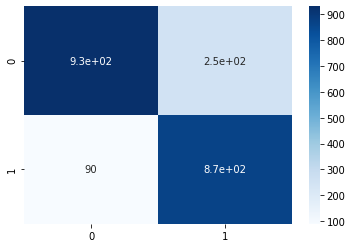

In [305]:
from sklearn.metrics import classification_report,confusion_matrix
cf_matrix=confusion_matrix(prediction, validation_y)
sns.heatmap(cf_matrix, annot=True, 
           cmap='Blues')

<hr style="border:1px solid gray"> </hr>

In [306]:
#lemmetiser,tfidf

pipeline1 = Pipeline([
        ('tfidf_transformer',TfidfVectorizer()),  
        ('classifier', LogisticRegression())
    ])
pipeline1.fit(training_data1 , training_y)

Pipeline(memory=None,
         steps=[('tfidf_transformer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True

In [307]:
predictions = pipeline1.predict(validation_data1)
print(classification_report(predictions,validation_y))

              precision    recall  f1-score   support

        fake       0.94      0.90      0.92      1056
        real       0.91      0.94      0.92      1084

    accuracy                           0.92      2140
   macro avg       0.92      0.92      0.92      2140
weighted avg       0.92      0.92      0.92      2140



## 2. SVM

In [308]:
from sklearn.svm import SVC, LinearSVC
special_pipeline = Pipeline([  
        ('tfidf_vectorizer', TfidfVectorizer()),  
        ('classifier', LinearSVC())
    ])

In [309]:
#lemmetiser, tf-idf
special_pipeline.fit(training_data1 , training_y)
prediction = special_pipeline.predict(validation_data1)

In [310]:
print(classification_report( prediction,validation_y))

              precision    recall  f1-score   support

        fake       0.95      0.92      0.93      1050
        real       0.92      0.95      0.94      1090

    accuracy                           0.93      2140
   macro avg       0.93      0.93      0.93      2140
weighted avg       0.93      0.93      0.93      2140



In [311]:
metrics = get_metrics(prediction, validation_y)
print(metrics)

{'accuracy': 0.93364, 'precision': 0.93395, 'recall': 0.93364, 'f1': 0.93361}


<hr style="border:1px solid gray"> </hr>

In [312]:
#stemmer, bow
pipeline2 = Pipeline([
        ('count_vectorizer', CountVectorizer()),  
        ('classifier', LinearSVC())
    ])
pipeline2.fit(training_data2 , training_y)
prediction = pipeline.predict(validation_data1)
print(classification_report( prediction,validation_y))
metrics = get_metrics(prediction, validation_y)
print(metrics)

              precision    recall  f1-score   support

        fake       0.91      0.79      0.84      1182
        real       0.78      0.91      0.84       958

    accuracy                           0.84      2140
   macro avg       0.84      0.85      0.84      2140
weighted avg       0.85      0.84      0.84      2140

{'accuracy': 0.84019, 'precision': 0.85054, 'recall': 0.84019, 'f1': 0.84054}


In [313]:
from sklearn.metrics import classification_report,confusion_matrix
cf_matrix=confusion_matrix(prediction, validation_y)

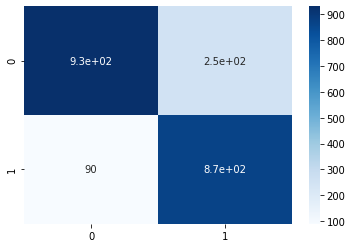

In [314]:
sns.heatmap(cf_matrix, annot=True, 
           cmap='Blues')

<hr style="border:1px solid gray"> </hr>

## 3.Decision Trees

              precision    recall  f1-score   support

        fake       0.87      0.86      0.87      1037
        real       0.87      0.88      0.88      1103

    accuracy                           0.87      2140
   macro avg       0.87      0.87      0.87      2140
weighted avg       0.87      0.87      0.87      2140

{'accuracy': 0.87243, 'precision': 0.87246, 'recall': 0.87243, 'f1': 0.87239}


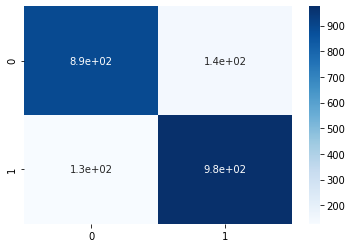

In [315]:
#lemmetiser,bow
from sklearn import tree
pipeline = Pipeline([
        ('bow', CountVectorizer()),    
        ('c', tree.DecisionTreeClassifier())
    ])
pipeline.fit(training_data1 , training_y)
prediction=pipeline.predict(validation_data1)
print(classification_report( prediction,validation_y))
metrics = get_metrics(prediction, validation_y)
print(metrics)
cf_matrix=confusion_matrix(prediction, validation_y)
sns.heatmap(cf_matrix, annot=True, 
           cmap='Blues')

<hr style="border:1px solid gray"> </hr>

              precision    recall  f1-score   support

        fake       0.90      0.79      0.85      1161
        real       0.79      0.90      0.84       979

    accuracy                           0.84      2140
   macro avg       0.85      0.85      0.84      2140
weighted avg       0.85      0.84      0.84      2140

{'accuracy': 0.84252, 'precision': 0.85025, 'recall': 0.84252, 'f1': 0.84272}


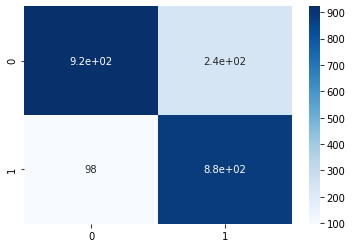

In [316]:
#stmmer,bow
from sklearn import tree
pipeline = Pipeline([
        ('bow', CountVectorizer()),    
        ('c', tree.DecisionTreeClassifier())
    ])
pipeline.fit(training_data2 , training_y)
prediction=pipeline.predict(validation_data1)
print(classification_report( prediction,validation_y))
metrics = get_metrics(prediction, validation_y)
print(metrics)
cf_matrix=confusion_matrix(prediction, validation_y)
sns.heatmap(cf_matrix, annot=True, 
           cmap='Blues')

## 4. Gradient Boost

              precision    recall  f1-score   support

        fake       0.91      0.84      0.87      1108
        real       0.84      0.91      0.87      1032

    accuracy                           0.87      2140
   macro avg       0.87      0.87      0.87      2140
weighted avg       0.87      0.87      0.87      2140

{'accuracy': 0.87103, 'precision': 0.87392, 'recall': 0.87103, 'f1': 0.871}


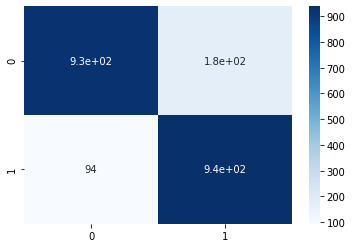

In [317]:
#lemmetiser,bow
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
pipeline = Pipeline([
        ('bow', CountVectorizer()),    
        ('c',GradientBoostingClassifier())
    ])
pipeline.fit(training_data1 , training_y)
prediction=pipeline.predict(validation_data1)
print(classification_report( prediction,validation_y))
metrics = get_metrics(prediction, validation_y)
print(metrics)
cf_matrix=confusion_matrix(prediction, validation_y)
sns.heatmap(cf_matrix, annot=True, 
           cmap='Blues')

<hr style="border:1px solid gray"> </hr>

              precision    recall  f1-score   support

        fake       0.91      0.79      0.84      1182
        real       0.78      0.91      0.84       958

    accuracy                           0.84      2140
   macro avg       0.84      0.85      0.84      2140
weighted avg       0.85      0.84      0.84      2140

{'accuracy': 0.84019, 'precision': 0.85054, 'recall': 0.84019, 'f1': 0.84054}


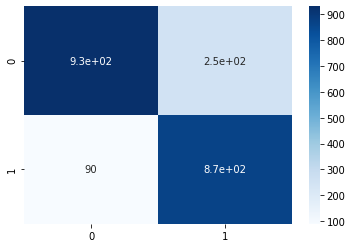

In [318]:
#stmmer,bow
from sklearn import tree
pipeline = Pipeline([
        ('bow', CountVectorizer()),    
        ('c', GradientBoostingClassifier())
    ])
pipeline.fit(training_data2, training_y)
prediction=pipeline.predict(validation_data1)
print(classification_report( prediction,validation_y))
metrics = get_metrics(prediction, validation_y)
print(metrics)
cf_matrix=confusion_matrix(prediction, validation_y)
sns.heatmap(cf_matrix, annot=True, 
           cmap='Blues')

<hr style="border:1px solid gray"> </hr>

## Testing

In [322]:
testing_data['tweet'] = testing_data['tweet'].map(lambda x: cleantext(x))
testing_y=testing_data['label'].values

In [323]:

y_pred=special_pipeline.predict(testing_data['tweet'])

              precision    recall  f1-score   support

        fake       0.95      0.91      0.93      1067
        real       0.91      0.95      0.93      1073

    accuracy                           0.93      2140
   macro avg       0.93      0.93      0.93      2140
weighted avg       0.93      0.93      0.93      2140

{'accuracy': 0.92944, 'precision': 0.93026, 'recall': 0.92944, 'f1': 0.9294}


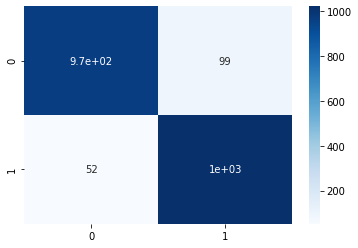

In [324]:
print(classification_report( y_pred,testing_y))
metrics = get_metrics(y_pred,testing_y)
print(metrics)
cf_matrix=confusion_matrix(y_pred,testing_y)
sns.heatmap(cf_matrix, annot=True, 
           cmap='Blues')